In [11]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.gaussian_process.kernels import RBF, ConstantKernel as C, RationalQuadratic as RQ, WhiteKernel, ExpSineSquared as Exp, DotProduct as Lin

np.random.seed(1)

# Load the data
df = pd.read_csv('weather_data.csv', sep=';')
df_array = np.asarray(df)

# Extract columns from the data
date = df_array[0:177, 0]
rec_num = df_array[0:177, 1]
ghi = df_array[0:177, 2]
DNI = df_array[0:177, 3]
DHI = df_array[0:177, 4]
DHI_shadowband = df_array[0:177, 5]
UVA = df_array[0:177, 6]
UVB = df_array[0:177, 7]
air_temp = df_array[0:177, 8]
BP = df_array[0:177, 9]
RH = df_array[0:177, 10]
WS = df_array[0:177, 11]
WD = df_array[0:177, 12]
WD_SD = df_array[0:177, 13]

# Combine selected columns into a target array
y = np.asarray([ghi, DNI, DHI, DHI_shadowband, UVA, UVB, air_temp, BP, RH, WS, WD, WD_SD]).T

# Create the input data in 2D format
X = np.atleast_2d([
    1., 2., 3., 4., 5., 6., 7., 8., 9., 10., 11., 12., 13., 14., 15., 16., 17., 18., 19., 20., 
    21., 22., 23., 24., 25., 26., 27., 28., 29., 30., 31., 32., 33., 34., 35., 36., 37., 38., 
    39., 40., 41., 42., 43., 44., 45., 46., 47., 48., 49., 50., 51., 52., 53., 54., 55., 56., 
    57., 58., 59., 60., 61., 62., 63., 64., 65., 66., 67., 68., 69., 70., 71., 72., 73., 74., 
    75., 76., 77., 78., 79., 80., 81., 82., 83., 84., 85., 86., 87., 88., 89., 90., 91., 92., 
    93., 94., 95., 96., 97., 98., 99., 100., 101., 102., 103., 104., 105., 106., 107., 108., 
    109., 110., 111., 112., 113., 114., 115., 116., 117., 118., 119., 120., 121., 122., 123., 
    124., 125., 126., 127., 128., 129., 130., 131., 132., 133., 134., 135., 136., 137., 138., 
    139., 140., 141., 142., 143., 144., 145., 146., 147., 148., 149., 150., 151., 152., 153., 
    154., 155., 156., 157., 158., 159., 160., 161., 162., 163., 164., 165., 166., 167., 168., 
    169., 170., 171., 172., 173., 174., 175., 176., 177.
]).T

# Set up a range for predictions
x = np.atleast_2d(np.linspace(1, 177, 10739)).T

# Instantiate and fit different Gaussian Process models

# First GP model with a combination of Constant and ExpSineSquared kernels
kernel = C() * Exp(length_scale=24, periodicity=1)
gp = GaussianProcessRegressor(kernel=kernel, n_restarts_optimizer=4)
gp.fit(X, y)

# Make predictions
y_pred_1, sigma_1 = gp.predict(x, return_std=True)

# Second GP model with a combination of Constant and RationalQuadratic kernels
kernel = C() * RQ(length_scale=24, alpha=1)
gp = GaussianProcessRegressor(kernel=kernel, n_restarts_optimizer=4)
gp.fit(X, y)

# Make predictions
y_pred_2, sigma_2 = gp.predict(x, return_std=True)

FileNotFoundError: [Errno 2] No such file or directory: 'weather_data.csv'

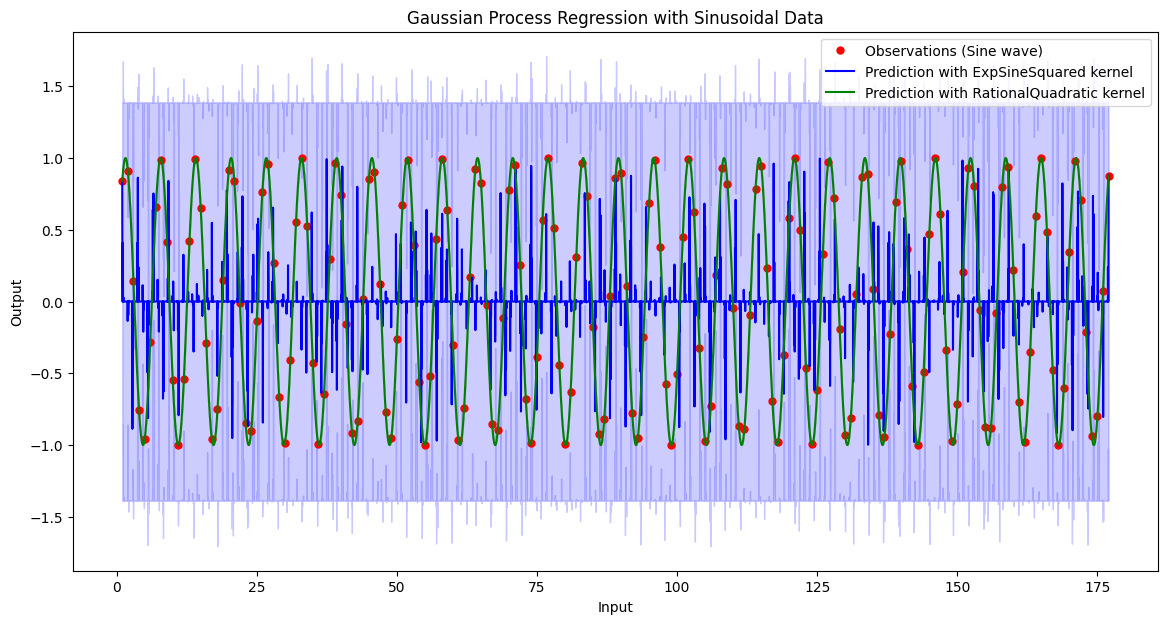

In [12]:
import numpy as np
from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.gaussian_process.kernels import ConstantKernel as C, ExpSineSquared as Exp, RationalQuadratic as RQ
import matplotlib.pyplot as plt

# Generate input data in 2D format
X = np.atleast_2d(np.linspace(1, 177, 177)).T

# Create sinusoidal target data
y = np.sin(X).ravel()  # Use a sine wave for y

# Set up a range for predictions
x = np.atleast_2d(np.linspace(1, 177, 10739)).T

# Instantiate and fit different Gaussian Process models

# First GP model with a combination of Constant and ExpSineSquared kernels
kernel = C() * Exp(length_scale=24, periodicity=1)
gp = GaussianProcessRegressor(kernel=kernel, n_restarts_optimizer=4)
gp.fit(X, y)

# Make predictions
y_pred_1, sigma_1 = gp.predict(x, return_std=True)

# Second GP model with a combination of Constant and RationalQuadratic kernels
kernel = C() * RQ(length_scale=24, alpha=1)
gp = GaussianProcessRegressor(kernel=kernel, n_restarts_optimizer=4)
gp.fit(X, y)

# Make predictions
y_pred_2, sigma_2 = gp.predict(x, return_std=True)

# Plotting the results
plt.figure(figsize=(14, 7))
plt.plot(X, y, 'r.', markersize=10, label='Observations (Sine wave)')
plt.plot(x, y_pred_1, 'b-', label='Prediction with ExpSineSquared kernel')
plt.fill_between(x.ravel(), y_pred_1 - 1.96 * sigma_1, y_pred_1 + 1.96 * sigma_1, alpha=0.2, color='blue')
plt.plot(x, y_pred_2, 'g-', label='Prediction with RationalQuadratic kernel')
plt.fill_between(x.ravel(), y_pred_2 - 1.96 * sigma_2, y_pred_2 + 1.96 * sigma_2, alpha=0.2, color='green')
plt.xlabel("Input")
plt.ylabel("Output")
plt.legend()
plt.title("Gaussian Process Regression with Sinusoidal Data")
plt.show()